In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# stat models for performing linear regression
import statsmodels.api as sm


In [3]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

# Linear model

We use a design matrix $B \in \mathbb{R}^{n \times m}$ and a covariance matrix $\Sigma \in \mathbb{R}^{n \times n}$ to generate data of the form
$$y = B x + \omega$$, 
where $\omega \sim N(0, \Sigma)$.

This can also be written as
$$ y \mid x, B, \sigma \sim N(B x, \Sigma)$$



In [4]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma)$.
        self.Beta = np.random.normal(size = [n_x + 1,  n_y])
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [5]:
# Initialise the generator for one-dimensional X and Y
generator = LinearModelGenerator(1, 1)


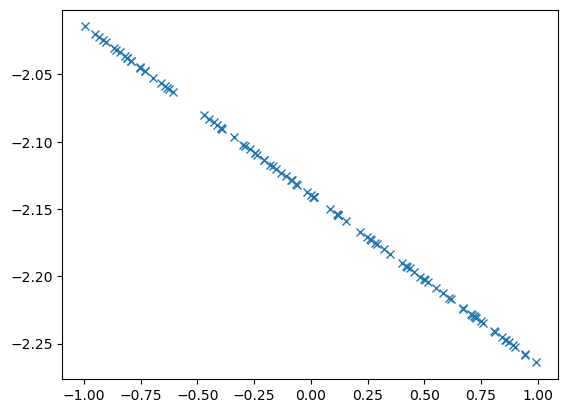

In [6]:
generator.sigma = 0.0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

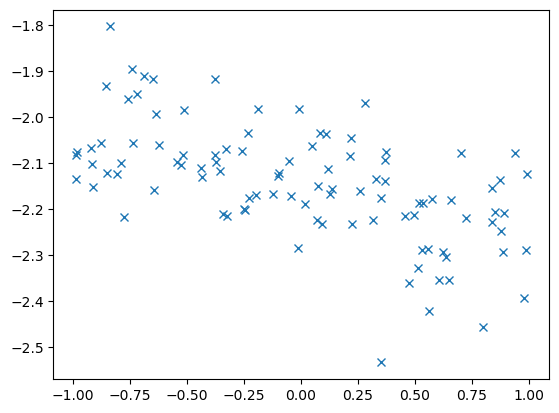

In [7]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

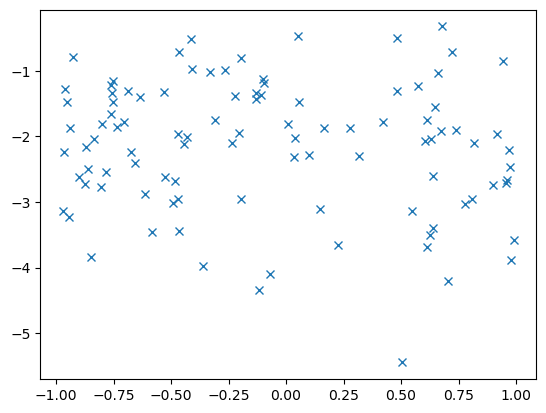

In [8]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

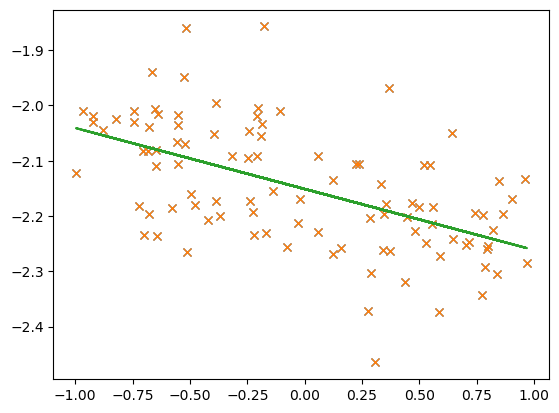

In [9]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
for t in range(Xa.shape[0]):
    X[t]
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("linear_fit.pdf")

In [10]:
# This class generates data from a simple non-linear model
class KernelModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int, n_centers: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.C = np.random.normal(size = [n_centers, n_x])
        self.Z = np.random.normal(size = [n_centers, n_y])
        self.n_centers = n_centers
        self.sigma = 1
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, :]
            D = np.array([np.linalg.norm(x - self.C[c]) for c in range(self.n_centers)])
            Y[t, :] =  np.dot(np.exp(-D), self.Z) + self.sigma * np.random.normal(size=self.n_y) 
        return X, Y

In [11]:

generator = KernelModelGenerator(1, 1, 10)

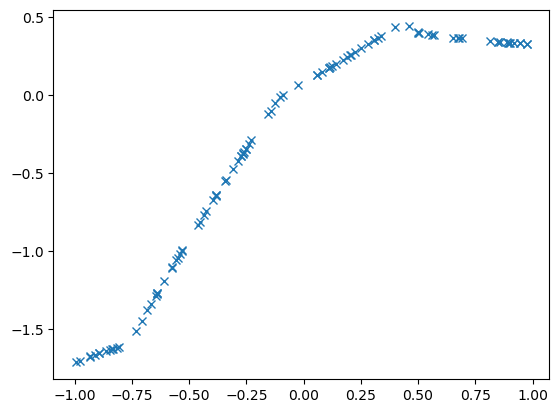

In [12]:
generator.sigma = 0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

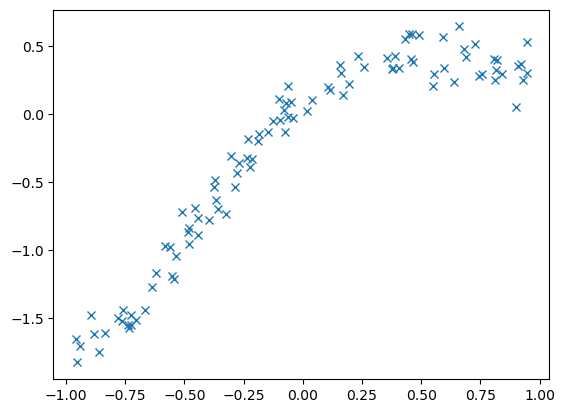

In [13]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

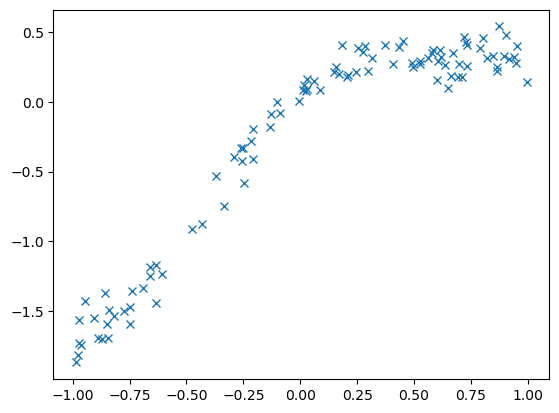

In [14]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

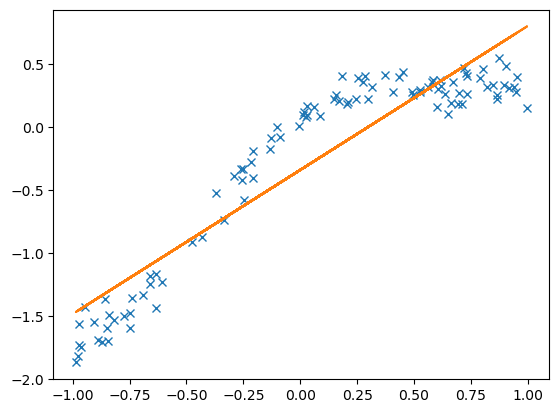

In [15]:
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
for t in range(X.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit.pdf")

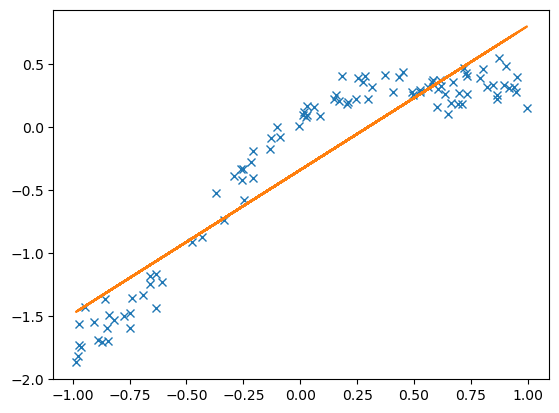

In [16]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
model = LinearRegression().fit(X, Y) # use X as is
Z = model.predict(X)
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit_sklearn.pdf")

In [17]:
X

array([[ 0.4081735 ],
       [-0.43287746],
       [ 0.24407524],
       [ 0.01586122],
       [-0.25741022],
       [ 0.71891115],
       [ 0.91893252],
       [-0.33400076],
       [ 0.61755401],
       [ 0.6352682 ],
       [ 0.49217154],
       [ 0.52691577],
       [ 0.61355311],
       [-0.81757893],
       [ 0.15813626],
       [-0.88792582],
       [ 0.02966519],
       [ 0.93778882],
       [ 0.20624815],
       [ 0.60578016],
       [ 0.69172336],
       [-0.77619101],
       [ 0.86610148],
       [ 0.20933331],
       [-0.94645482],
       [ 0.94905171],
       [ 0.7323741 ],
       [ 0.58018226],
       [ 0.08645964],
       [ 0.17024581],
       [-0.2083633 ],
       [-0.25348589],
       [ 0.43548069],
       [-0.9785076 ],
       [ 0.27434829],
       [ 0.37206565],
       [-0.63363225],
       [ 0.56183791],
       [-0.65998622],
       [ 0.01140336],
       [ 0.28444666],
       [ 0.81929674],
       [ 0.29597746],
       [-0.68926781],
       [ 0.71246936],
       [-0